# Analysing MNIST with CLIP 

Please note: do not use ```pip install clip``` as this is a different library!

### Contents
0. Install package
1. Load model & run dummy script
2. Running an image from the MNIST dataset¶

### Sources: 
- https://archive.ph/XRFjo An introduction to CLIP on Medium
- https://github.com/openai/CLIP

## 0. Install packages

In [1]:
pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /private/var/folders/cj/qtbz9fvd3svc0x28yv2756mh0000gn/T/pip-req-build-fn13pm6d
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /private/var/folders/cj/qtbz9fvd3svc0x28yv2756mh0000gn/T/pip-req-build-fn13pm6d
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=2f5aa2a84c876bb251d031df6d1e8fdd14ead36f5e70e1973a1c90863d458a5d
  Stored in directory: /private/var/folders/cj/qtbz9fvd3svc0x28yv2756mh0000gn/T/pip-ephem-wheel-cache-5dximt8c/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys 
print(sys. version)

3.10.9 (main, Mar  1 2023, 12:33:47) [Clang 14.0.6 ]


In [3]:
# make sure the conda libraries are recognized here
import sys

_ = sys.path.append("/usr/local/lib/python3.10/site-packages")

## 1. Load model & run dummy script

In [4]:
import torch
import clip

device = "cuda" if torch.cuda.is_available() else "cpu"

# load model and image preprocessing
model, preprocess = clip.load("ViT-B/32", device=device, jit=False)

100%|███████████████████████████████████████| 338M/338M [00:42<00:00, 8.23MiB/s]


In [8]:
#inspect clip methods
print(dir(clip))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'available_models', 'clip', 'load', 'model', 'simple_tokenizer', 'tokenize']


In [10]:
# Run a dummy script
#source: https://github.com/openai/CLIP
import os
import clip
import torch
from torchvision.datasets import CIFAR100

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

# Download the dataset
cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=True, train=False)

# Prepare the inputs
image, class_id = cifar100[3637]
image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]).to(device)

# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{cifar100.classes[index]:>16s}: {100 * value.item():.2f}%")

Files already downloaded and verified

Top predictions:

           snake: 65.31%
          turtle: 12.29%
    sweet_pepper: 3.83%
          lizard: 1.88%
       crocodile: 1.75%


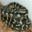

In [9]:
#print the image. Note: CIFAR images are very small
image

## 2. Running an image from the MNIST dataset